In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load Dataset

In [2]:
data = pd.read_csv('hospital_readmission.csv')

Display first few rows of the dataset to inspect

In [3]:
print(data.head())

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                14                  41               0               11   
1                 2                  30               0               12   
2                 5                  66               0               22   
3                 3                  63               0                8   
4                 5                  40               0                6   

   number_outpatient  number_emergency  number_inpatient  number_diagnoses  \
0                  0                 0                 0                 6   
1                  0                 0                 1                 9   
2                  1                 0                 2                 9   
3                  0                 0                 0                 8   
4                  0                 0                 1                 9   

   race_Caucasian  race_AfricanAmerican  ...  citoglipton_No  insulin_No  

In [4]:
data.dtypes

time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
                              ...  
metformin-rosiglitazone_No     bool
metformin-pioglitazone_No      bool
change_No                      bool
diabetesMed_Yes                bool
readmitted                    int64
Length: 65, dtype: object

# 2. Handle Missing Values

In [5]:
print(data.isnull().sum().sum())

print(data.isnull().sum())

0
time_in_hospital              0
num_lab_procedures            0
num_procedures                0
num_medications               0
number_outpatient             0
                             ..
metformin-rosiglitazone_No    0
metformin-pioglitazone_No     0
change_No                     0
diabetesMed_Yes               0
readmitted                    0
Length: 65, dtype: int64


# 3. Convert boolean columns to 0 and 1 (True -> 1, False -> 0)

In [6]:
print(data['race_Caucasian'])

0         True
1         True
2         True
3         True
4         True
         ...  
16994     True
16995    False
16996     True
16997     True
16998     True
Name: race_Caucasian, Length: 16999, dtype: bool


In [7]:
boolean_columns = data.select_dtypes(include=['bool']).columns.tolist()

for column in boolean_columns:
    data[column] = data[column].astype(int)


In [8]:
print(data['race_Caucasian'])

0        1
1        1
2        1
3        1
4        1
        ..
16994    1
16995    0
16996    1
16997    1
16998    1
Name: race_Caucasian, Length: 16999, dtype: int32


# 4. Prepare Feature Matrix (X) and Target Vector (y)

In [9]:
X = data.drop(columns=['readmitted']).values 
y = data['readmitted'].values  

X = np.c_[np.ones((X.shape[0], 1)), X] 

print("\nShape of Feature Matrix (X):", X.shape)
print("Shape of Target Vector (y):", y.shape)



Shape of Feature Matrix (X): (16999, 65)
Shape of Target Vector (y): (16999,)


# 5. Split the Data into Training and Test Sets (80% train, 20% test)

In [10]:
np.random.seed(42) 
shuffle_indices = np.random.permutation(len(X))  
test_size = int(len(X) * 0.2)

test_indices = shuffle_indices[:test_size]
train_indices = shuffle_indices[test_size:]

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (13600, 65)
Shape of X_test: (3399, 65)
Shape of y_train: (13600,)
Shape of y_test: (3399,)


# 6. Multilinear Regression Model Using closed-formed Normal Equation

-> Compute optimal theta using normal equation

In [11]:
def normal_equation(X, y):
    X_transpose = np.transpose(X)
    theta = (np.linalg.pinv(np.dot(X_transpose, X))) @ np.dot(X_transpose, y)
    return theta

theta = normal_equation(X_train, y_train)

# 7. Evaluate the Model

# a. Make Predictions on Test Set

In [12]:
y_pred = np.dot(X_test, theta)

In [13]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)


Shape of y_test: (3399,)
Shape of y_pred: (3399,)


In [14]:
print(y_test)
print(y_pred)

[1 1 0 ... 0 1 0]
[0.53291307 0.70086078 0.57289989 ... 0.44486044 0.37145243 0.37556687]


-> Calculate the threshold as the mean of the predicted values

In [15]:
threshold = np.mean(y_pred)  
print("Threshold for classification:", threshold)

y_final = np.where(y_pred >= threshold, 1, 0)

print(y_test)
print(y_final)


Threshold for classification: 0.4573837363808726
[1 1 0 ... 0 1 0]
[1 1 1 ... 0 0 0]


# b. Calculate RMSE

In [16]:
rmse = np.sqrt(np.mean((y_final - y_test) ** 2))
print("RMSE:", rmse)

RMSE: 0.6143809567265508


# c. Calculate R² Score

In [17]:
def r2_score(y_test, y_final):
    ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
    ss_residual = np.sum((y_test - y_final) ** 2)
    return 1 - (ss_residual / ss_total)

r2 = r2_score(y_test, y_final)
print("R² Score:", r2)

R² Score: -0.5196590685751801


# d. Calculate Accuracy

In [18]:
accuracy = np.mean(y_final == y_test) * 100
print("Accuracy:", accuracy, "%")

Accuracy: 62.25360400117682 %


# e. Plot Actual (y_test) vs Predicted (y_pred) Values

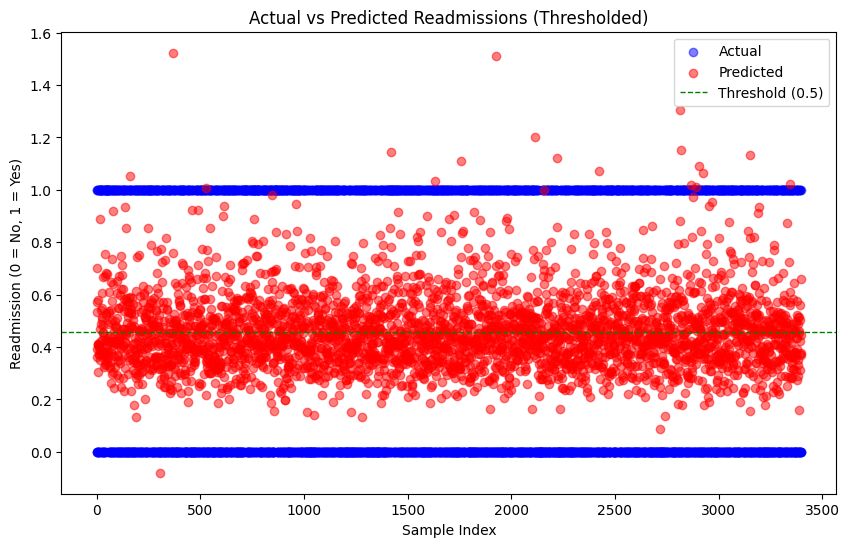

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted', alpha=0.5)

threshold = np.mean(y_pred)  
plt.axhline(y=threshold, color='green', linestyle='--', linewidth=1, label='Threshold (0.5)')

plt.title('Actual vs Predicted Readmissions (Thresholded)')
plt.xlabel('Sample Index')
plt.ylabel('Readmission (0 = No, 1 = Yes)')
plt.legend()
plt.show()

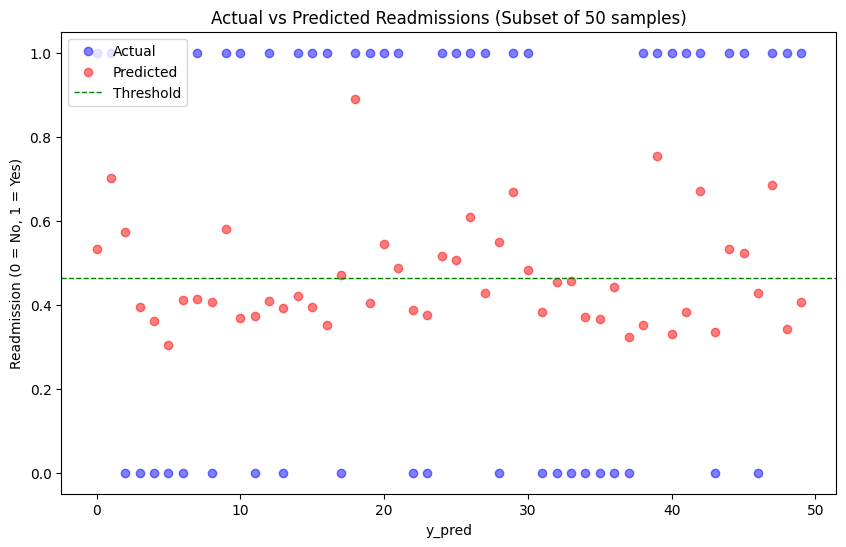

In [20]:
subset_size = 50
y_test_subset = y_test[:subset_size]
y_pred_subset = y_pred[:subset_size]

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_subset)), y_test_subset, color='blue', label='Actual', alpha=0.5)
plt.scatter(range(len(y_test_subset)), y_pred_subset, color='red', label='Predicted', alpha=0.5)

threshold = np.mean(y_pred_subset)
plt.axhline(y=threshold, color='green', linestyle='--', linewidth=1, label='Threshold')

plt.title('Actual vs Predicted Readmissions (Subset of 50 samples)')
plt.xlabel('y_pred')
plt.ylabel('Readmission (0 = No, 1 = Yes)')
plt.legend()
plt.show()


# f. Plot Actual (y_test) vs Predicted (y_final) Values

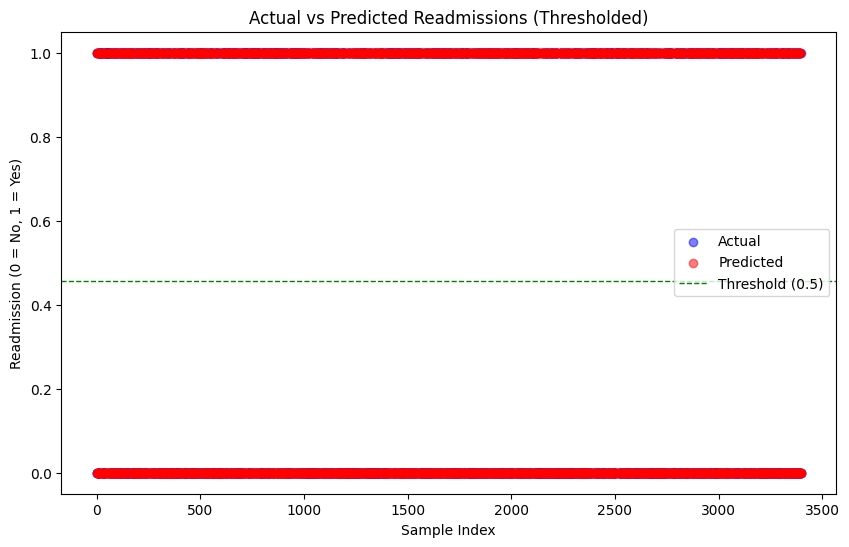

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(range(len(y_test)), y_final, color='red', label='Predicted', alpha=0.5)

threshold = np.mean(y_pred)  
plt.axhline(y=threshold, color='green', linestyle='--', linewidth=1, label='Threshold (0.5)')

plt.title('Actual vs Predicted Readmissions (Thresholded)')
plt.xlabel('Sample Index')
plt.ylabel('Readmission (0 = No, 1 = Yes)')
plt.legend()
plt.show()

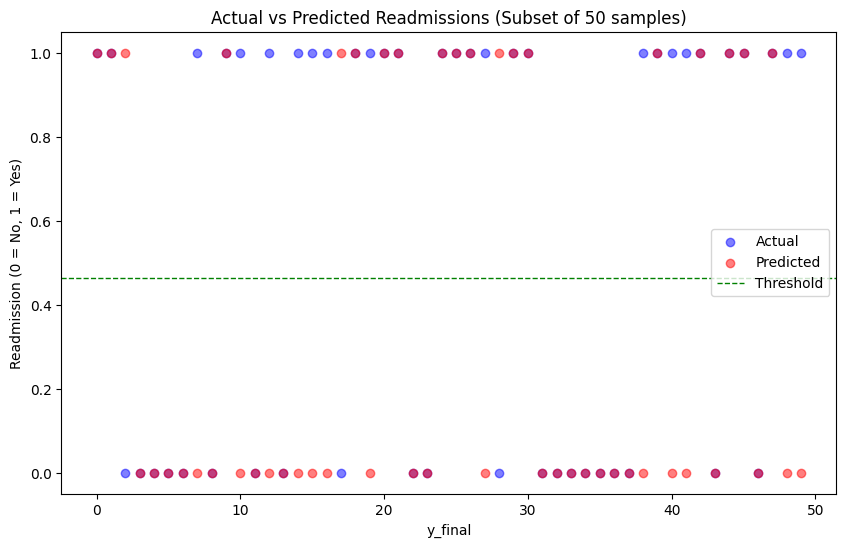

In [22]:
subset_size = 50
y_test_subset = y_test[:subset_size]
y_final_subset = y_final[:subset_size]

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_subset)), y_test_subset, color='blue', label='Actual', alpha=0.5)
plt.scatter(range(len(y_test_subset)), y_final_subset, color='red', label='Predicted', alpha=0.5)

threshold = np.mean(y_pred_subset)
plt.axhline(y=threshold, color='green', linestyle='--', linewidth=1, label='Threshold')

plt.title('Actual vs Predicted Readmissions (Subset of 50 samples)')
plt.xlabel('y_final')
plt.ylabel('Readmission (0 = No, 1 = Yes)')
plt.legend()
plt.show()


# <u>8. Done Feature Selection as Pre-proccessing and continue model implementation and evaluation.</u>

# Feature Selection Based on Correlation with 'readmitted'

-> Calculate the correlation of all features with the target ('readmitted')

-> Select features with correlation > 0.1 or < -0.1 with 'readmitted'

In [23]:
correlation_matrix = data.corr()

correlated_features = correlation_matrix['readmitted'].abs().sort_values(ascending=False)
selected_features = correlated_features[correlated_features > 0.1].index.tolist()
selected_features.remove('readmitted') 

print("\nSelected Features based on correlation with 'readmitted':")
print(selected_features)


Selected Features based on correlation with 'readmitted':
['number_inpatient', 'number_diagnoses']


In [24]:
X = data[selected_features].values  
y = data['readmitted'].values  

X = np.c_[np.ones((X.shape[0], 1)), X] 

print("\nShape of Feature Matrix (X):", X.shape)
print("Shape of Target Vector (y):", y.shape)


Shape of Feature Matrix (X): (16999, 3)
Shape of Target Vector (y): (16999,)


In [25]:
np.random.seed(42) 
shuffle_indices = np.random.permutation(len(X))  
test_size = int(len(X) * 0.2)

test_indices = shuffle_indices[:test_size]
train_indices = shuffle_indices[test_size:]

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (13600, 3)
Shape of X_test: (3399, 3)
Shape of y_train: (13600,)
Shape of y_test: (3399,)


In [26]:
def normal_equation(X, y):
    X_transpose = np.transpose(X)
    theta = np.linalg.inv(np.dot(X_transpose, X)) @ np.dot(X_transpose, y)
    return theta

theta = normal_equation(X_train, y_train)

In [27]:
y_pred = np.dot(X_test, theta)

In [28]:
threshold = np.mean(y_pred)  
print("Threshold for classification:", threshold)

y_final = np.where(y_pred >= threshold, 1, 0)

print(y_test)
print(y_final)

Threshold for classification: 0.457658275679545
[1 1 0 ... 0 1 0]
[1 1 0 ... 0 0 0]


In [29]:
accuracy = np.mean(y_final == y_test) * 100
print("Accuracy:", accuracy, "%")

Accuracy: 61.72403648131804 %


# <u>9. Apply Multilinear Regression formula on the selected features evaluate the model.</u>

In [30]:
X1_train = X_train[:, 1]
X2_train = X_train[:, 2]
Y_train = y_train

N = len(Y_train)
X1_mean = np.mean(X1_train)
X2_mean = np.mean(X2_train)
Y_mean = np.mean(Y_train)

sum_X1Y = np.sum(X1_train * Y_train)
sum_X2Y = np.sum(X2_train * Y_train)
sum_X1 = np.sum(X1_train)
sum_X2 = np.sum(X2_train)
sum_Y = np.sum(Y_train)
sum_X1_sq = np.sum(X1_train ** 2)
sum_X2_sq = np.sum(X2_train ** 2)
sum_X1X2 = np.sum(X1_train * X2_train)

b1 = ((sum_X2_sq * sum_X1Y) - (sum_X1X2 * sum_X2Y)) / ((sum_X1_sq * sum_X2_sq) - (sum_X1X2 ** 2))
b2 = ((sum_X1_sq * sum_X2Y) - (sum_X1X2 * sum_X1Y)) / ((sum_X1_sq * sum_X2_sq) - (sum_X1X2 ** 2))

a = Y_mean - b1 * X1_mean - b2 * X2_mean

y_pred = a + b1 * X_test[:, 1] + b2 * X_test[:, 2]

In [31]:
threshold = np.mean(y_pred)  
y_final = np.where(y_pred >= threshold, 1, 0)

# Print actual vs. predicted values for verification
print("Actual values (y_test):", y_test)
print("Predicted values (y_final):", y_final)

Actual values (y_test): [1 1 0 ... 0 1 0]
Predicted values (y_final): [1 1 0 ... 1 0 0]


In [32]:
accuracy = np.mean(y_final == y_test) * 100
print("Accuracy:", accuracy, "%")

Accuracy: 58.54663136216535 %


# <u>10. Apply Gradient descent at place of normal equation for model implementation.</u>

# Implementation of gradient descent

In [33]:
def gradient_descent(X, y, learning_rate=0.33, epochs=1000):
    m = len(y)
    theta = np.zeros(X.shape[1]) 

    for epoch in range(epochs):

        y_pred = X.dot(theta)
        gradient = (1 / m) * X.T.dot(y_pred - y)
        theta -= learning_rate * gradient

    return theta

theta = gradient_descent(X_train, y_train, learning_rate=0.033, epochs=1000)
print("Theta (weights) from gradient descent:", theta)

Theta (weights) from gradient descent: [0.19618683 0.08074711 0.0280789 ]


In [34]:
y_pred = np.dot(X_test, theta)

threshold = np.mean(y_pred)
print("Threshold for classification:", threshold)

y_final = np.where(y_pred >= threshold, 1, 0)

print("Actual values (y_test):", y_test)
print("Predicted values (y_final):", y_final)

Threshold for classification: 0.4559574869436578
Actual values (y_test): [1 1 0 ... 0 1 0]
Predicted values (y_final): [1 1 0 ... 0 0 0]


In [35]:
accuracy = np.mean(y_final == y_test) * 100
print("Accuracy:", accuracy, "%")

Accuracy: 61.66519564577817 %
